#縣市2011-2015肺癌相關資料


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
cancer = pd.read_excel("data for report.xlsx")
cancer.head()

,year,city code,city,average life,age65,plantAmount,plant,Sex ratio,Unemployment,Tax,bed,PM10 (μg/m3),SO2 (ppb),NO2 (ppb),pop,smoking rate,cancer,cars
0,2011,1,New Taipei City,80.46,334479,1,1,98.14,4.4,168759548,42.00,42.0,3.5,17.20,3916451,21.9,1803,3284713
1,2012,1,New Taipei City,80.50,353396,1,1,97.69,4.2,186386348,42.21,38.0,3.1,16.00,3939305,19.5,2003,3309078
2,2013,1,New Taipei City,80.59,374883,1,1,97.27,4.2,204029784,41.13,41.8,3.4,16.10,3954929,20.8,1998,3233275
3,2014,1,New Taipei City,80.75,400545,1,1,96.86,3.9,221096918,42.85,43.1,3.4,16.60,3966818,18.4,2160,3178499
4,2015,1,New Taipei City,80.96,429175,0,1,96.64,3.7,246632933,43.29,40.1,3.2,15.85,3970644,17.7,2175,3183551


In [0]:
cancer["city"].unique()

array(['New Taipei City', 'Taipei City', 'Taoyuan City', 'Taichung City',
       'Tainan City', 'Kaohsiung City', 'Yilan County', 'Hsinchu County',
       'Miaoli County', 'Changhua County', 'Nantou County',
       'Yunlin County', 'Chiayi County', 'Pingtung County',
       'Taitung County', 'Hualien County', 'Keelung City', 'Hsinchu City',
       'Chiayi City'], dtype=object)

In [0]:
cancer["year"].unique()

array([2011, 2012, 2013, 2014, 2015])

In [0]:
groupbeYear = cancer.groupby("year")
cancer_year_ser = groupbeYear["cancer"].sum()
cancer_year_ser.index

Int64Index([2011, 2012, 2013, 2014, 2015], dtype='int64', name='year')

In [0]:
cancer_year_ser.values

array([10972, 11601, 11661, 12386, 13002])

In [0]:
smoking_year_ser = groupbeYear["smoking rate"].mean()
smoking_year_ser.index
smoking_year_ser.values

array([19.12105263, 18.76315789, 17.50526316, 17.16842105, 17.20526316])

##歷年肺癌人數與吸菸率關係
觀察近年肺癌人數逐漸上升，，吸菸被列為最有可能罹患肺癌的原因，希望透過下列方式確認肺癌與吸菸之關係是否為正相關？

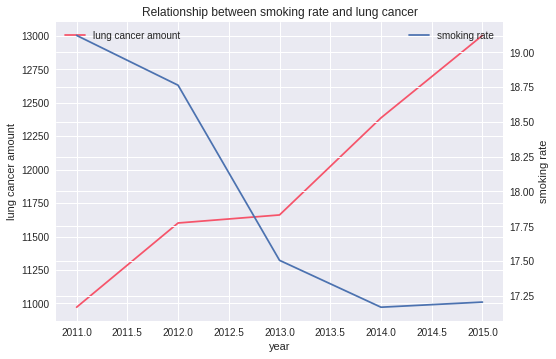

In [0]:
fig = plt.figure()
can = fig.add_subplot(111)
can.plot(cancer_year_ser.index, cancer_year_ser.values ,label = "lung cancer amount", color="#f6546a")
smoking = can.twinx()
smoking.plot(smoking_year_ser.index, smoking_year_ser.values, label = "smoking rate")
can.set_xlabel("year")
can.set_ylabel("lung cancer amount")
smoking.set_ylabel("smoking rate")
plt.title("Relationship between smoking rate and lung cancer")
can.legend()
smoking.legend()
plt.legend()
plt.show()

 由上圖可知，歷年肺癌人數與吸菸率呈負向關係。`


##各縣市歷年罹患肺癌人數
因此想檢視哪一個縣市罹患肺癌人數最多


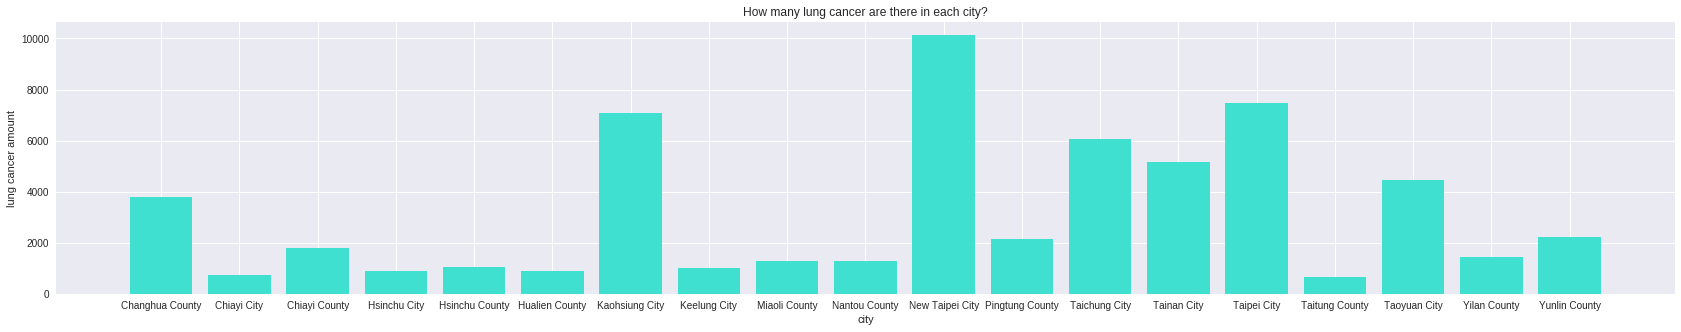

In [55]:
figure, axis = plt.subplots(figsize=(29, 5))
amount_each_city = len(city_ser.values)
plt.bar(range(amount_each_city), city_ser.values, color="#40e0d0")
plt.xticks(range(amount_each_city), city_ser.index)
plt.title("How many lung cancer are there in each city?")
plt.xlabel("city")
plt.ylabel("lung cancer amount")
plt.show()

發現新北市累計罹患肺癌人數最多


#腦中風人數
腦中風是國人十大死因的第二名，僅次於癌症。
男性與女性分別於45與55歲以後罹患腦中風的風險就會增加

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
brain_stroke = pd.read_excel("腦中風人數.xlsx")
brain_stroke.head()


,年度季別,醫事機構代碼,醫事機構名稱,特約類別,腦中風病人住院日起一百八十日內之案件件數,腦中風病人住院日起一百八十日內之手術件數,腦中風病人住院日起一百八十日內之平均住院日數,所屬分區業務組指標值,全國指標值,縣市別,行政區
0,10504,1532040039,天成醫院,地區醫院,3,3.0,1.0000,0.8559,0.863,Taoyuan City,楊梅區
1,10504,117030010,衛生福利部臺中醫院,區域醫院,2,2.0,1.0000,0.8944,0.863,Taichung City,西區
2,10504,501110514,三軍總醫院附設民眾診療服務處,醫學中心,24,32.0,0.7500,0.8964,0.863,Taipei City,內湖區
3,10504,601160016,臺北榮民總醫院,醫學中心,47,52.0,0.9038,0.8964,0.863,Taipei City,北投區
4,10504,622020017,臺中榮民總醫院嘉義分院,區域醫院,1,2.0,0.5000,0.7216,0.863,Chiayi City,西區


In [85]:
#更換欄名
col_names = ["year", "hosp_code", "hosp_name", "hosp_type", "case", "surgery", "be_in_hosp", "區域指標值", "全國指標值", "city", "village"]
brain_stroke.columns = col_names
brain_stroke.head()

,year,hosp_code,hosp_name,hosp_type,case,surgery,be_in_hosp,區域指標值,全國指標值,city,village
0,10504,1532040039,天成醫院,地區醫院,3,3.0,1.0000,0.8559,0.863,Taoyuan City,楊梅區
1,10504,117030010,衛生福利部臺中醫院,區域醫院,2,2.0,1.0000,0.8944,0.863,Taichung City,西區
2,10504,501110514,三軍總醫院附設民眾診療服務處,醫學中心,24,32.0,0.7500,0.8964,0.863,Taipei City,內湖區
3,10504,601160016,臺北榮民總醫院,醫學中心,47,52.0,0.9038,0.8964,0.863,Taipei City,北投區
4,10504,622020017,臺中榮民總醫院嘉義分院,區域醫院,1,2.0,0.5000,0.7216,0.863,Chiayi City,西區


In [86]:
brain_stroke["year"].unique()

array([10504, 10201, 10302, 10101, 10203, 10501, 10202, 10402, 10204,
       10102, 10404, 10301, 10304, 10401, 10303, 10403, 10103, 10503,
       10502, 10603, 10702, 10604, 10602, 10701])

In [87]:
brain_stroke["city"].unique()

array(['Taoyuan City', 'Taichung City', 'Taipei City', 'Chiayi City',
       'Kaohsiung City', 'Changhua County', 'Keelung City',
       'Hsinchu City', 'Nantou County', 'Chiayi County',
       'Pingtung County', 'Tainan City', 'Yilan County',
       'New Taipei City', 'Hsinchu County', 'Yunlin County',
       'Taitung County', 'Miaoli County', 'Hualien County', 'Wuhu County'],
      dtype=object)

In [94]:
#取出台北市資料
is_taipei = brain_stroke["city"] == "Taipei City"
is_center = brain_stroke["hosp_type"] == "醫學中心"
is_year = brain_stroke["year"] == 10701
taipei_per_season = brain_stroke[is_taipei]
taipei_per_season.tail()

grouped = taipei_per_season.groupby("year")
case_counts_ser = grouped["case"].sum()
case_counts_ser.index

Int64Index([10101, 10102, 10103, 10201, 10202, 10203, 10204, 10301, 10302,
            10303, 10304, 10401, 10402, 10403, 10404, 10501, 10502, 10503,
            10504, 10602, 10603, 10604, 10701, 10702],
           dtype='int64', name='year')

In [102]:
grouped = brain_stroke.groupby("year")
case_counts_ser = grouped["case"].sum()
case_counts_ser.index
case_counts_ser.values

array([3603, 1891, 1883, 1772, 2053, 2058, 2195, 1923, 2217, 2028, 2014,
       1898, 2165, 1985, 2052, 1799, 2134, 2036, 2009, 2156, 2182, 2160,
       1907, 2443])

##歷年每季腦中風人數

天氣變化，氣溫急速下降是一種外來的壓力，會改變心臟血管收縮狀態，增加心臟負荷，導致心肌缺氧變化，因而引發心肌梗塞。高血壓、心血管疾病老人常容易發生腦中風。，因此想知道季節是否與腦中風人數有關？

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


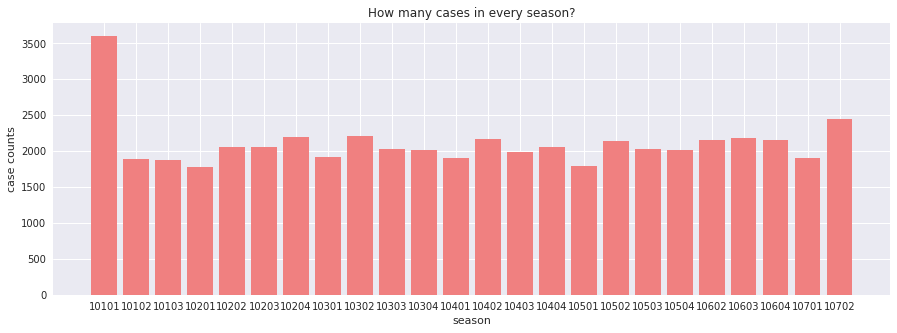

In [104]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(figsize=(15, 5))
continent_cnts = len(case_counts_ser.values)
plt.bar(range(continent_cnts), case_counts_ser.values, color="#f08080")
plt.xticks(range(continent_cnts), case_counts_ser.index)
plt.title("How many cases in every season?")
plt.xlabel("season")
plt.ylabel("case counts")
plt.show()

冬季並無較其他季節有更高的發生次數

In [105]:
year107_s1 = brain_stroke[is_year]
year107_s1.head()

,year,hosp_code,hosp_name,hosp_type,case,surgery,be_in_hosp,區域指標值,全國指標值,city,village
2457,10701,101090517,Taipei City立聯合醫院,區域醫院,43,44.0,0.9773,0.0,0.0,Taipei City,大同區
2458,10701,111070010,衛生福利部基隆醫院,區域醫院,6,6.0,1.0000,0.0,0.0,Keelung City,信義區
2459,10701,131020016,New Taipei City立聯合醫院,區域醫院,5,6.0,0.8333,0.0,0.0,New Taipei City,三重區
2460,10701,143010011,衛生福利部屏東醫院,區域醫院,4,5.0,0.8000,0.0,0.0,Pingtung County,屏東市
2461,10701,412040012,國立臺灣大學醫學院附設醫院新竹分院,區域醫院,8,11.0,0.7273,0.0,0.0,Hsinchu City,北區


In [106]:
groupbe2 = year107_s1.groupby("city")
case_sum_city = groupbe2["case"].sum().sort_values(ascending=False)
case_sum_city.index

Index(['Taipei City', 'Taichung City', 'New Taipei City', 'Kaohsiung City',
       'Tainan City', 'Taoyuan City', 'Changhua County', 'Yilan County',
       'Hsinchu City', 'Nantou County', 'Keelung City', 'Taitung County',
       'Hualien County', 'Chiayi City', 'Pingtung County', 'Chiayi County',
       'Yunlin County', 'Miaoli County', 'Wuhu County', 'Hsinchu County'],
      dtype='object', name='city')

In [107]:
case_sum_city.values

array([370, 354, 255, 237, 146, 130, 120,  62,  49,  37,  29,  22,  21,
        19,  15,  15,  15,  10,   1,   0])

##107年第一季各縣市case數
想知道各地區腦中風人數是相差甚大？

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


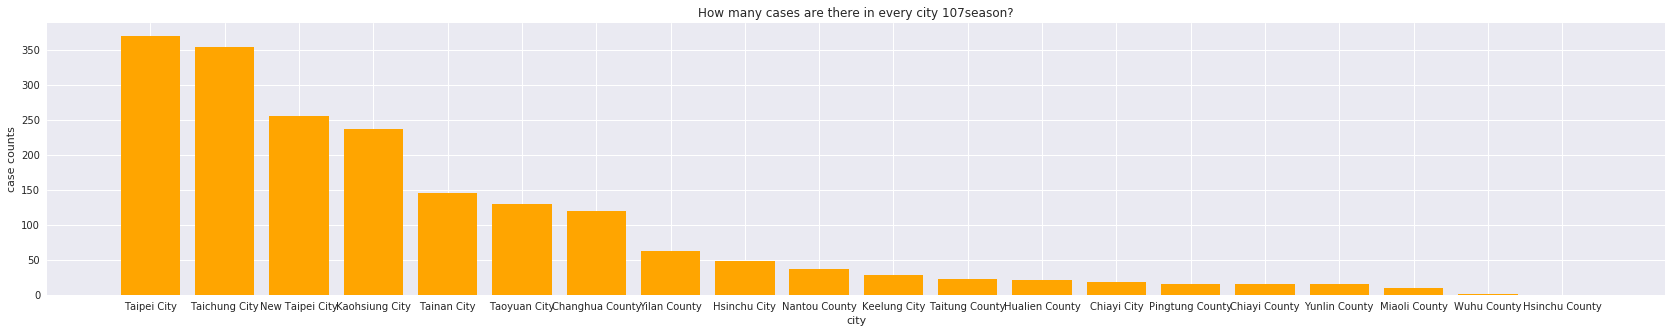

In [111]:
import matplotlib.pyplot as plt
amount = len(case_sum_city.values)
figure, axis = plt.subplots(figsize=(29, 5))
plt.bar(range(amount), case_sum_city.values, color="#ffa500")
plt.xticks(range(amount), case_sum_city.index)
plt.title("How many cases are there in every city 107season?")
plt.xlabel("city")
plt.ylabel("case counts")

plt.show()

##發生案例數與手術數之關聯

耳聞腦中風於將來生活有很大的影響，需要手術治療，因此好奇發生案例與需要手術是否有很大的關聯？

Text(0,0.5,'surgery')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


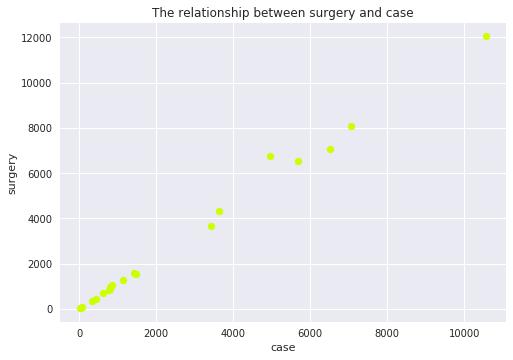

In [134]:
plt.scatter(city_total["case"].sum(), city_total["surgery"].sum(), color="#ccff00")
plt.title("The relationship between surgery and case")
plt.xlabel("case")
plt.ylabel("surgery")
